In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

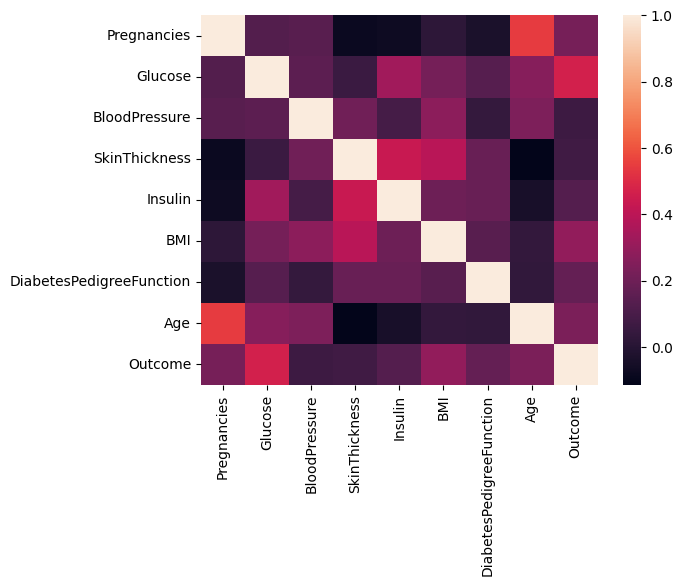

In [ ]:
sns.heatmap(df.corr())

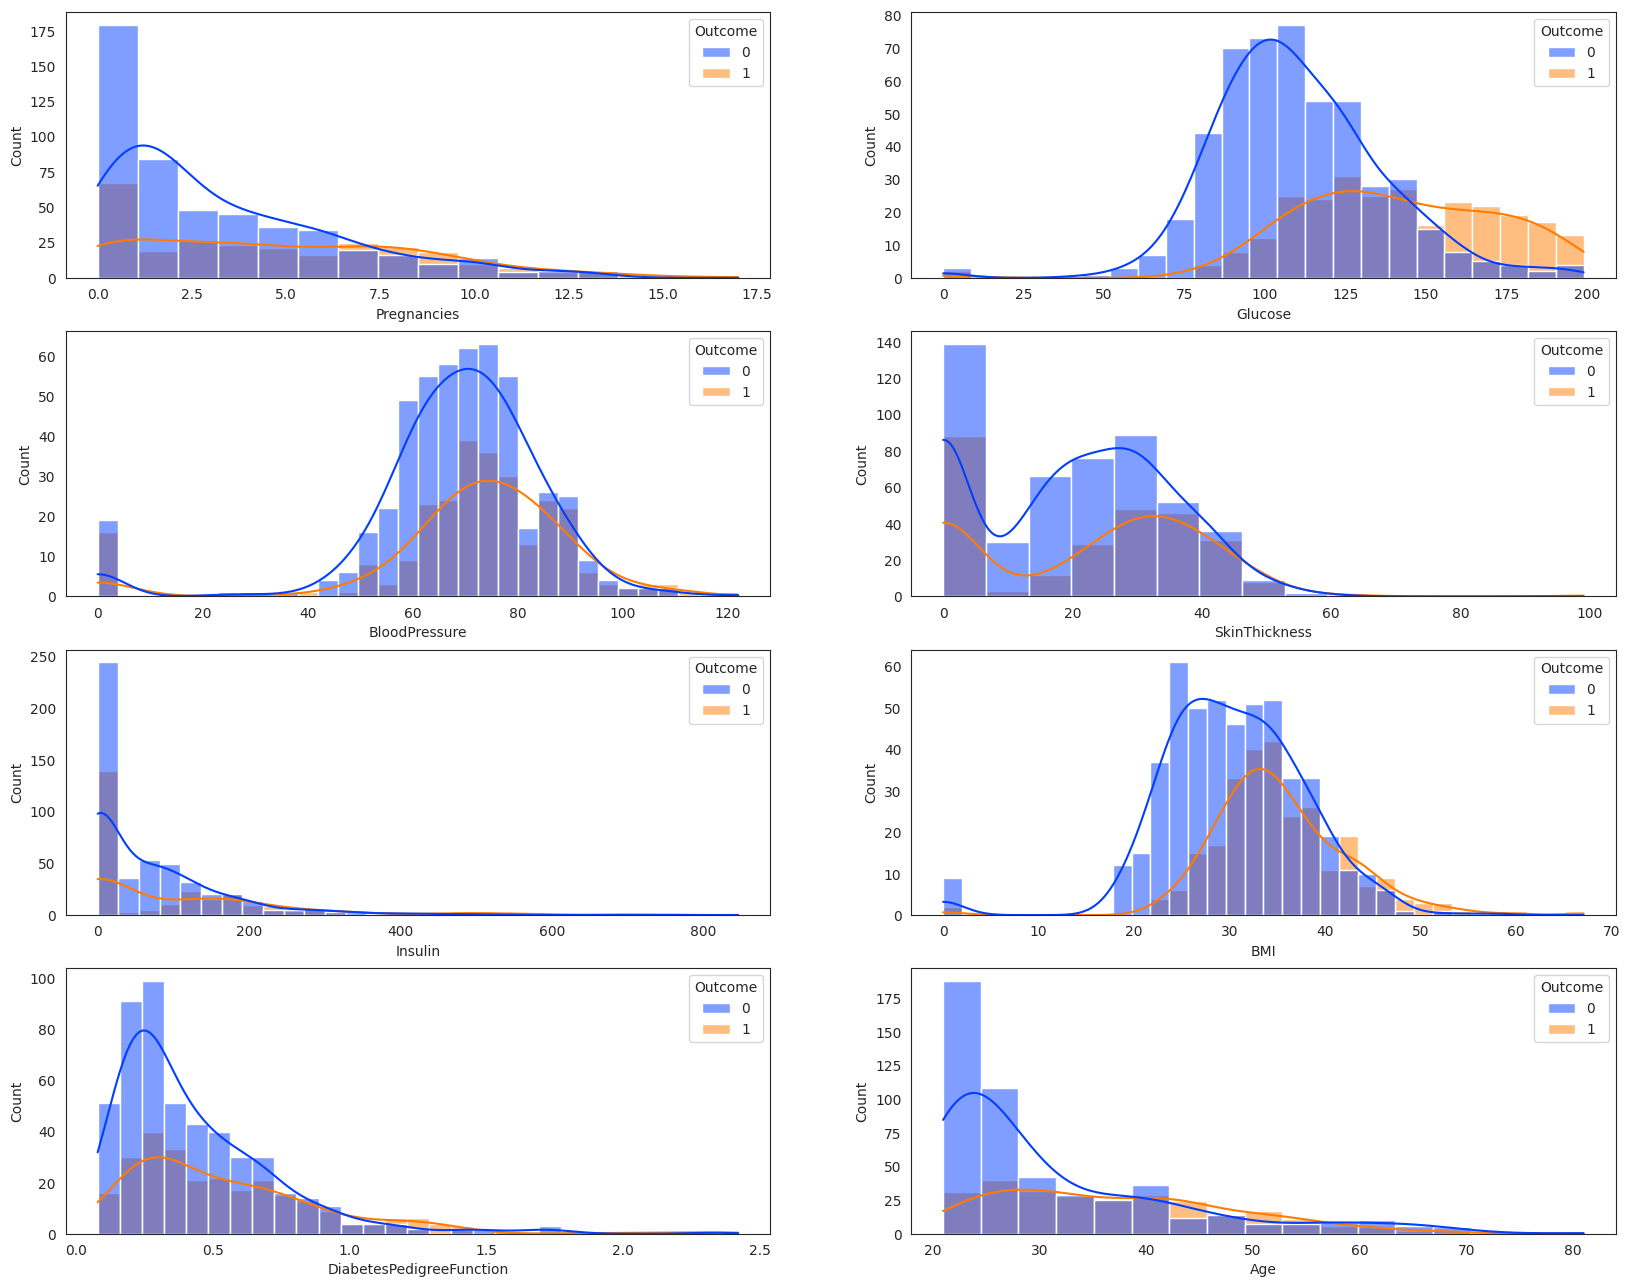

In [ ]:
col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize = (20,20))
i = 1;
for name in col:
    plt.subplot(5,2,i)
    sns.histplot( data=df, x=name, hue="Outcome",kde=True )
    i = i + 1

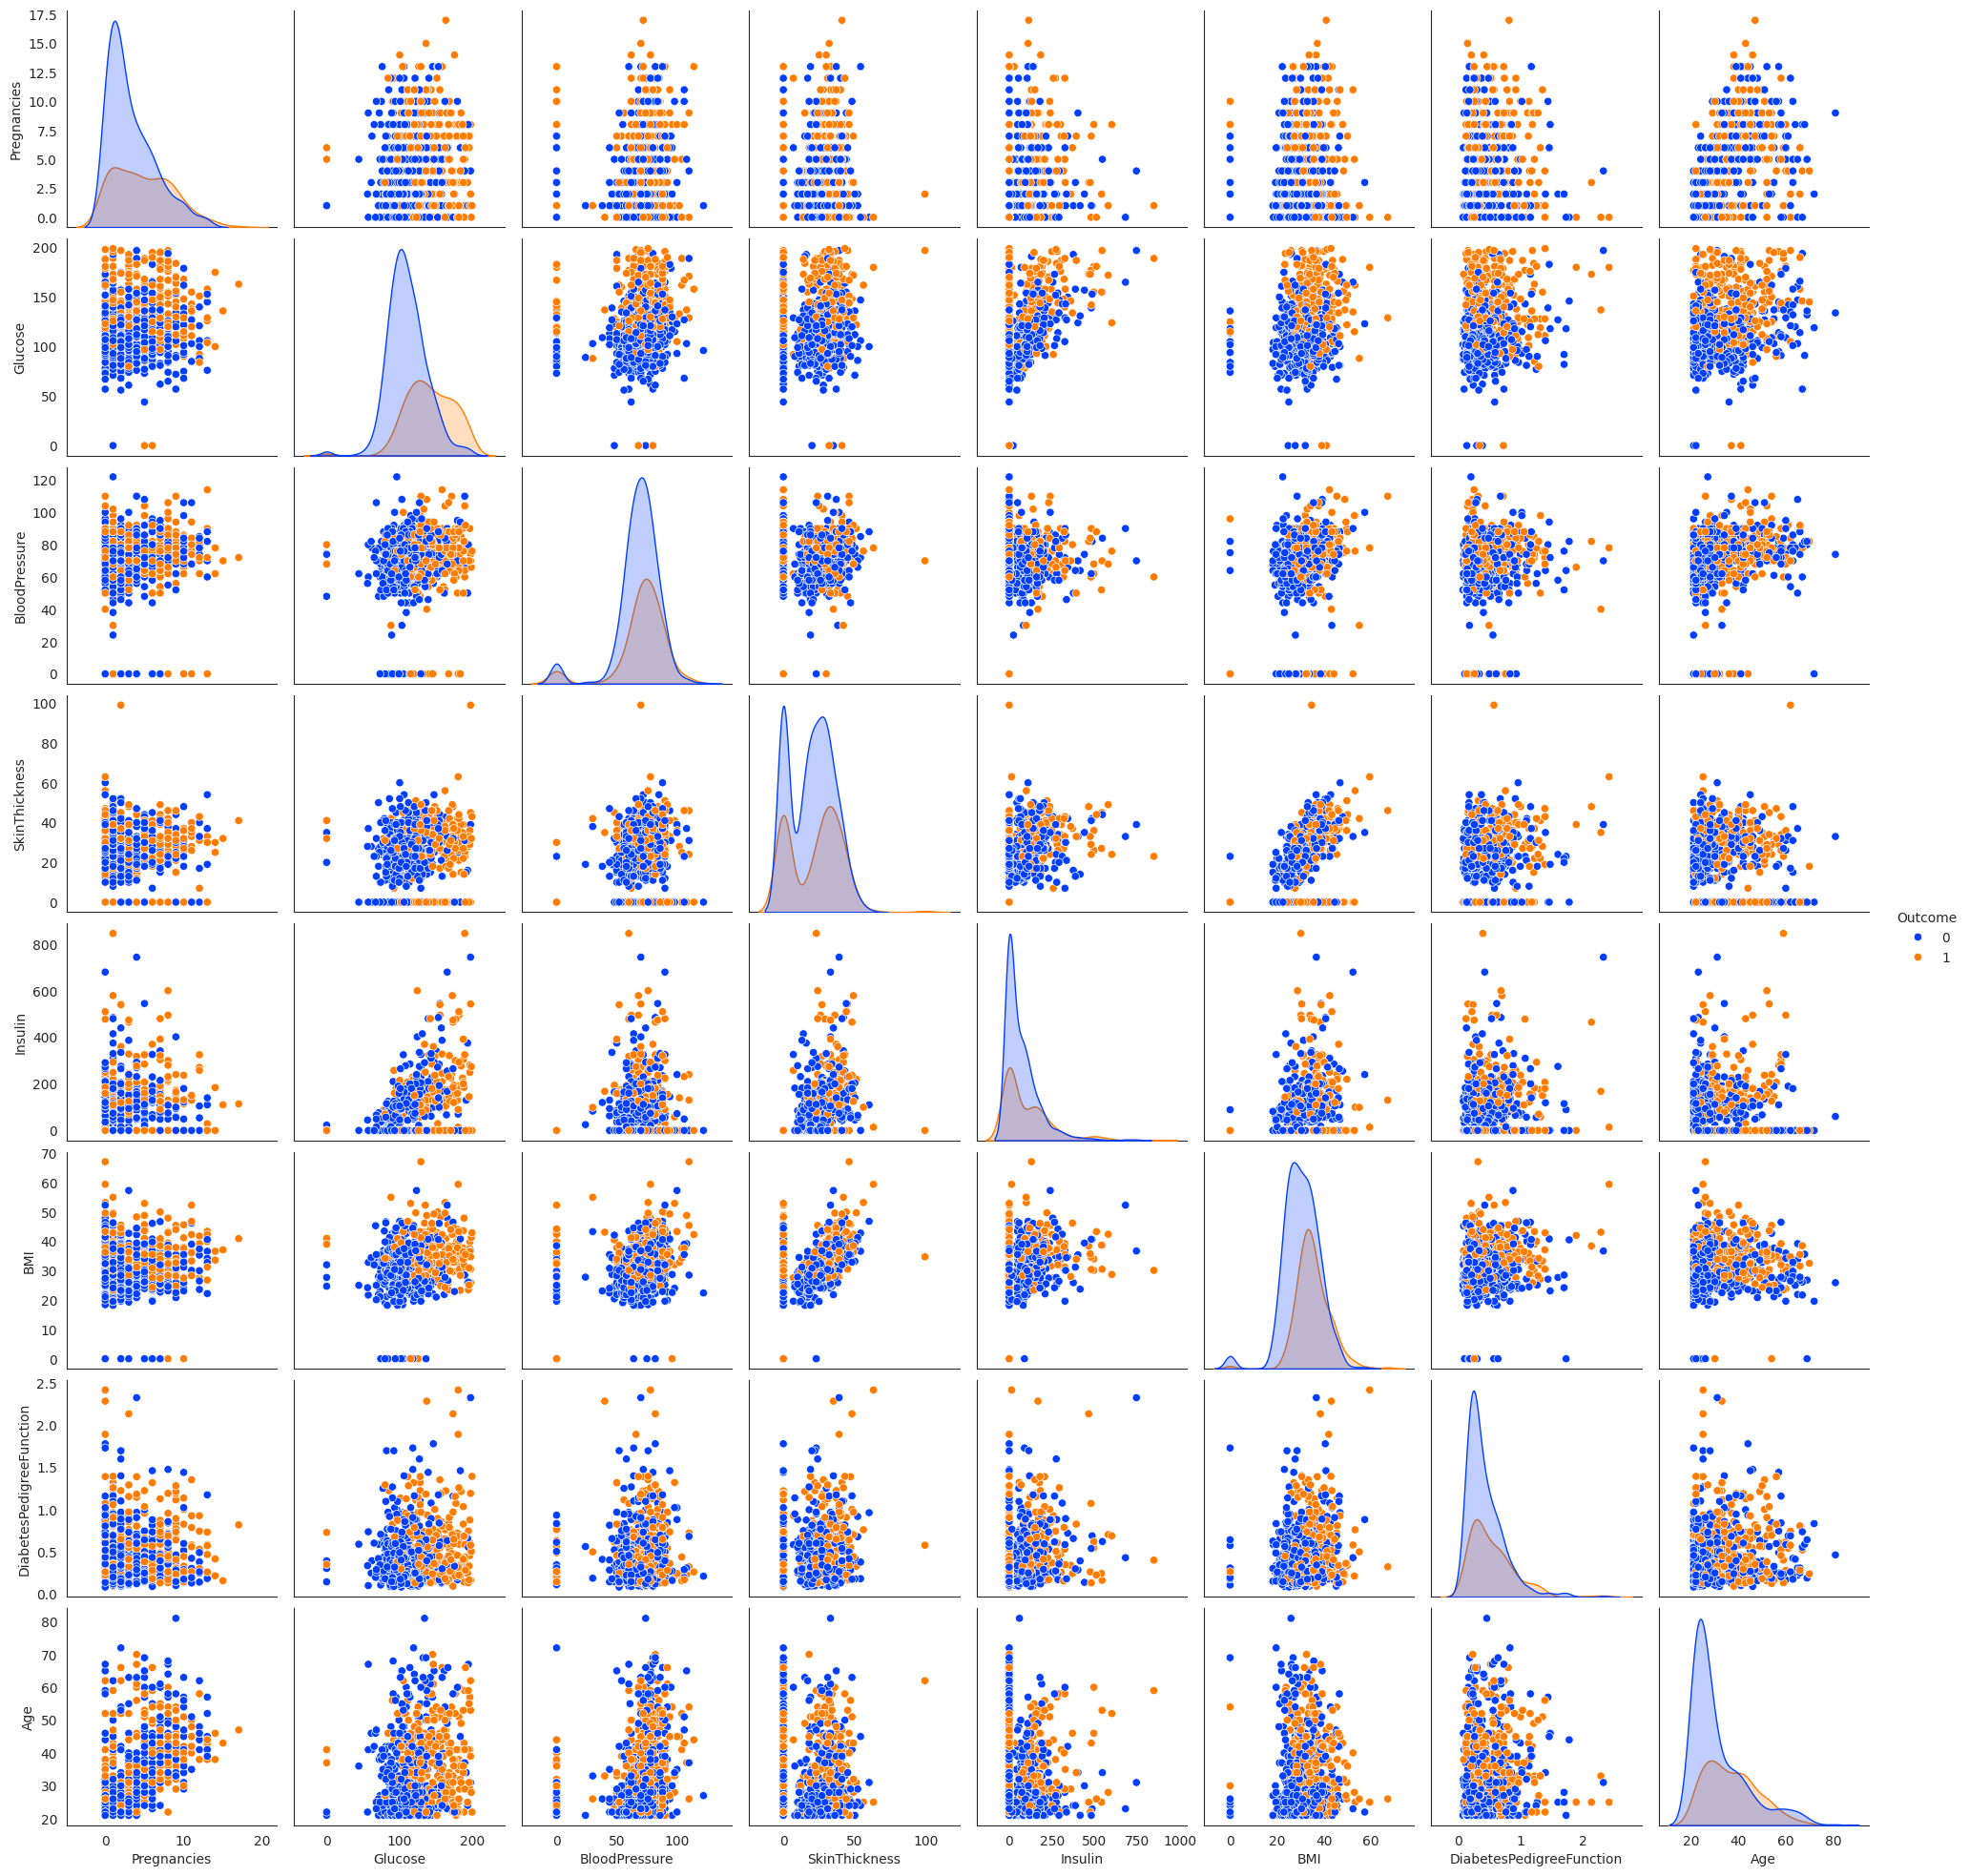

In [ ]:
sns.pairplot(df, hue='Outcome')

In [ ]:
X=df.drop('Outcome' , axis=1)
Y = df['Outcome']

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y ,train_size=0.8 )

In [ ]:
print("-------------------------Model 1 Logistic R-----------------------")
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, Y_train)

print("Accuracy: ", lr.score(X_test, Y_test) * 100)

expected = Y
predicted = lr.predict(X)
print(classification_report(expected, predicted))
print(confusion_matrix(expected, predicted))

-------------------------Model 1 Logistic R-----------------------
Accuracy:  74.67532467532467
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       500
           1       0.76      0.58      0.66       268

    accuracy                           0.79       768
   macro avg       0.78      0.74      0.75       768
weighted avg       0.79      0.79      0.78       768

[[451  49]
 [113 155]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
print("-------------------------Model 2 Random Forest -----------------------")

forest = RandomForestClassifier(n_estimators=25)
forest.fit(X, Y)
print("Score : ",forest.score(X, Y)*100 , "%")

expected = Y
predicted = forest.predict(X)
print(classification_report(expected, predicted))
print(confusion_matrix(expected, predicted))

-------------------------Model 2 Random Forest -----------------------
Score :  99.34895833333334 %
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       500
           1       1.00      0.98      0.99       268

    accuracy                           0.99       768
   macro avg       1.00      0.99      0.99       768
weighted avg       0.99      0.99      0.99       768

[[500   0]
 [  5 263]]


In [ ]:
print("-------------------------Model 3 SVM-----------------------")

svm = SVC(kernel='linear')
svm.fit(X, Y)
Y_pred = svm.predict(X_test)

print("Score :", (accuracy_score(Y_test, Y_pred))*100,"%")

expected = Y
predicted = svm.predict(X)
print(classification_report(expected, predicted))
print(confusion_matrix(expected, predicted))

-------------------------Model 3 SVM-----------------------
Score : 75.97402597402598 %
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.73      0.57      0.64       268

    accuracy                           0.78       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768

[[443  57]
 [114 154]]


In [ ]:
print("-------------------------Model 4 XGBoost-----------------------")

xgb_model = xgb.XGBClassifier(n_estimators=800, max_depth=20)
xgb_model.fit(X_train, Y_train)
Y_pred = xgb_model.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, Y_pred) * 100, "%")

expected = Y
predicted = xgb_model.predict(X)
print(classification_report(expected, predicted))
print(confusion_matrix(expected, predicted))


-------------------------Model 4 XGBoost-----------------------
Accuracy Score: 72.07792207792207 %
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       500
           1       0.93      0.91      0.92       268

    accuracy                           0.94       768
   macro avg       0.94      0.94      0.94       768
weighted avg       0.94      0.94      0.94       768

[[482  18]
 [ 25 243]]
